In [133]:
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
df = pd.read_csv('ILINet/ILINet 22-23.csv')

In [135]:
df.head()

,YEAR,WEEK,TOTAL PATIENTS
0,2022,40,2209359
1,2022,41,2223106
2,2022,42,2279700
3,2022,43,2462467
4,2022,44,2510305


In [136]:
df.describe()

,YEAR,WEEK,TOTAL PATIENTS
count,52.000000,52.000000,5.200000e+01
mean,2022.750000,26.500000,2.239639e+06
std,0.437237,15.154757,1.059476e+05
min,2022.000000,1.000000,2.058533e+06
25%,2022.750000,13.750000,2.167204e+06
50%,2023.000000,26.500000,2.223658e+06
75%,2023.000000,39.250000,2.275103e+06
max,2023.000000,52.000000,2.564503e+06


In [137]:
df['Year-Week'] = df['YEAR'].astype(str) + '-' + df['WEEK'].astype(str)

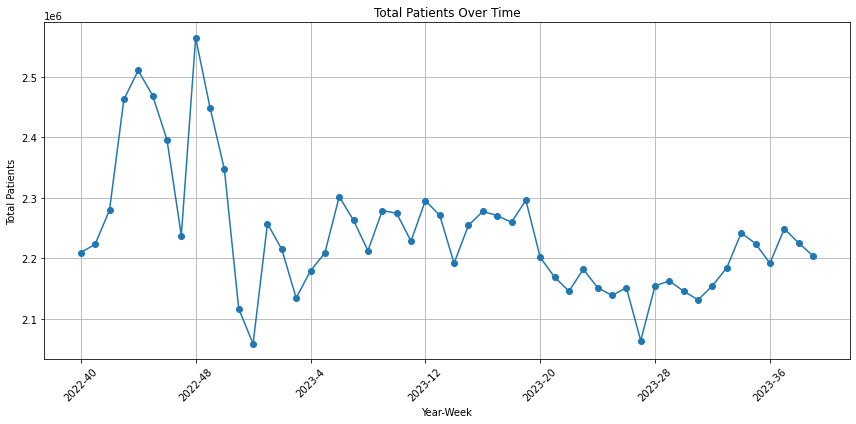

In [138]:
plt.figure(figsize=(12, 6))
plt.plot(df['Year-Week'], df['TOTAL PATIENTS'], marker='o', linestyle='-')
plt.title('Total Patients Over Time')
plt.xlabel('Year-Week')
plt.ylabel('Total Patients')
x_ticks = df['Year-Week'][::8] 
plt.xticks(x_ticks, rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()

In [139]:
import pandas as pd
n = 2  # window size
df['Rolling Mean'] = df['TOTAL PATIENTS'].rolling(window=n).mean()
df['Rolling SD'] = df['TOTAL PATIENTS'].rolling(window=n).std()
print(df)

    YEAR  WEEK  TOTAL PATIENTS Year-Week  Rolling Mean     Rolling SD
0   2022    40         2209359   2022-40           NaN            NaN
1   2022    41         2223106   2022-41     2216232.5    9720.596921
2   2022    42         2279700   2022-42     2251403.0   40018.001174
3   2022    43         2462467   2022-43     2371083.5  129235.785077
4   2022    44         2510305   2022-44     2486386.0   33826.574198
5   2022    45         2468962   2022-45     2489633.5   29233.915655
6   2022    46         2396019   2022-46     2432490.5   51578.489940
7   2022    47         2237505   2022-47     2316762.0  112086.324313
8   2022    48         2564503   2022-48     2401004.0  231222.503234
9   2022    49         2448985   2022-49     2506744.0   81683.561149
10  2022    50         2347026   2022-50     2398005.5   72095.900303
11  2022    51         2116491   2022-51     2231758.5  163012.861801
12  2022    52         2058533   2022-52     2087512.0   40982.494824
13  2023     1      

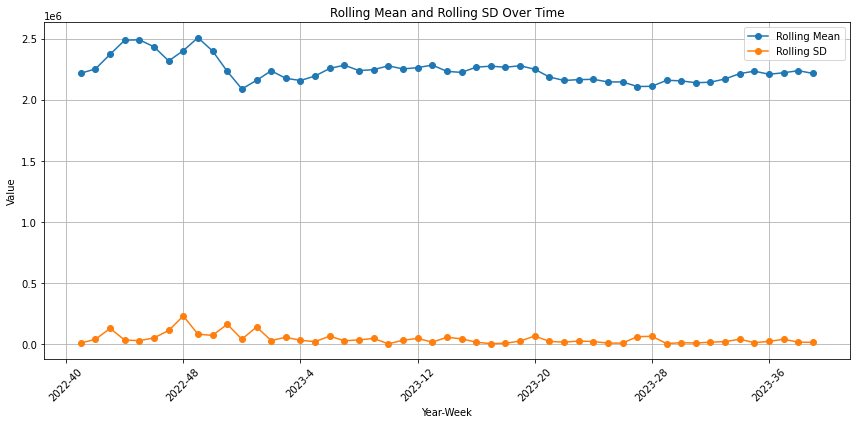

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['Year-Week'], df['Rolling Mean'], label='Rolling Mean', marker='o', linestyle='-')
plt.plot(df['Year-Week'], df['Rolling SD'], label='Rolling SD', marker='o', linestyle='-')

plt.title('Rolling Mean and Rolling SD Over Time')
plt.xlabel('Year-Week')
plt.ylabel('Value')
x_ticks = df['Year-Week'][::8]
plt.xticks(x_ticks, rotation=45)  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [141]:
# pip install statsmodels

In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [143]:
value_column = 'TOTAL PATIENTS'

In [144]:
decomposition = seasonal_decompose(df[value_column], model='additive', period=3)  

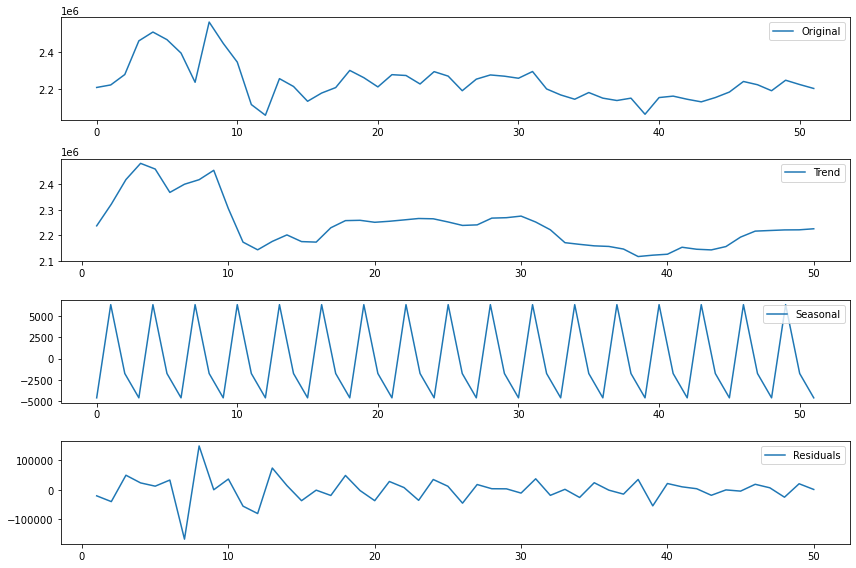

In [145]:
plt.figure(figsize=(12, 8))

# Original Time Series
plt.subplot(4, 1, 1)
plt.plot(df[value_column], label='Original')
plt.legend(loc='best')

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')

# Residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [146]:
from statsmodels.tsa.stattools import adfuller

In [147]:
result = adfuller(df[value_column])
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

ADF Statistic: -3.1333030385987
p-value: 0.02418478499481326
Critical Values:
   1%: -3.5812576580093696
   5%: -2.9267849124681518
   10%: -2.6015409829867675


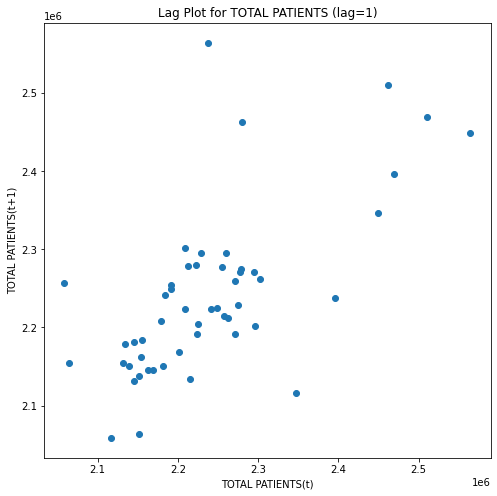

In [148]:
from pandas.plotting import lag_plot
plt.figure(figsize=(8, 8))
lag_plot(df[value_column], lag=1)
plt.title(f'Lag Plot for {value_column} (lag=1)')
plt.xlabel(f'{value_column}(t)')
plt.ylabel(f'{value_column}(t+1)')
plt.show()